In [2]:
import numpy as np
from matplotlib import pylab as plt
import pyperclip as clip
import subprocess 




In [3]:
points_on_leaf=np.arange(0,79,5)

In [4]:
lengths_at_points=np.array([160.5,162,163.1,164.3,165.2,165.8,166.2,166.6,166.9,167.1,166.9,166.5,166.1,165.4,164.5,163.5])
lengths_at_points=np.flip(lengths_at_points)

(20, 180)

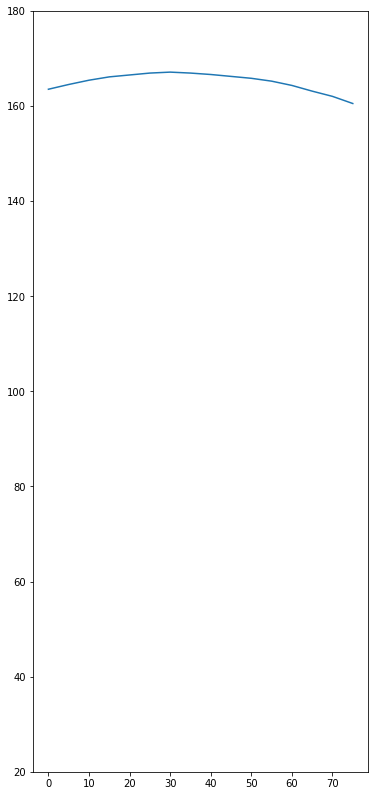

In [5]:
fig,ax=plt.subplots(1,1,figsize=(6,14))
plt.plot(points_on_leaf,lengths_at_points)
plt.ylim(20,180)

In [6]:
for ij,point in enumerate(points_on_leaf):
    print("0   0   0 1 0   0 "+str(point)+" "+str(lengths_at_points[ij]))

0   0   0 1 0   0 0 163.5
0   0   0 1 0   0 5 164.5
0   0   0 1 0   0 10 165.4
0   0   0 1 0   0 15 166.1
0   0   0 1 0   0 20 166.5
0   0   0 1 0   0 25 166.9
0   0   0 1 0   0 30 167.1
0   0   0 1 0   0 35 166.9
0   0   0 1 0   0 40 166.6
0   0   0 1 0   0 45 166.2
0   0   0 1 0   0 50 165.8
0   0   0 1 0   0 55 165.2
0   0   0 1 0   0 60 164.3
0   0   0 1 0   0 65 163.1
0   0   0 1 0   0 70 162.0
0   0   0 1 0   0 75 160.5


In [1]:
narrow_x0=1
wide_x0=1
half_length_x0=1
total_string=""
for ij in range(0,len(points_on_leaf)-1):
    mlc_string="mlc_y"+str(ij)
    if lengths_at_points[ij]<lengths_at_points[ij+1]:
        narrow_x=lengths_at_points[ij]
        wide_x=lengths_at_points[ij+1]
    else:
        wide_x=lengths_at_points[ij+1]
        narrow_x=lengths_at_points[ij]
        
    if ij==0:
        narrow_x0=narrow_x
        wide_x0=wide_x
        half_length_x0=wide_x0+narrow_x0/2
        
    half_length_x=(wide_x+narrow_x)/4
    
    translation_x=30+half_length_x
    translation_z=30-ij*5
    stringthing="/gate/mlc_leaf/daughters/name                      "+mlc_string+" \n"+\
    "/gate/mlc_leaf/daughters/insert                      wedge \n"+\
    "/gate/"+mlc_string+"/setMaterial                  Tungsten \n"+\
    "/gate/"+mlc_string+"/geometry/setNarrowerXLength  "+str(narrow_x)+" mm \n"+\
    "/gate/"+mlc_string+"/geometry/setXLength          "+str(wide_x)+" mm  \n"+\
    "/gate/"+mlc_string+"/geometry/setYLength          5 mm \n"+\
    "/gate/"+mlc_string+"/geometry/setZLength          3 mm \n"+\
    "/gate/"+mlc_string+"/placement/setTranslation     "+str(translation_x)+" 50 "+str(translation_z)+" mm \n"+\
    "/gate/"+mlc_string+"/placement/setRotationAxis    1 0 0  \n"+\
    "/gate/"+mlc_string+"/placement/setRotationAngle   90 deg \n"+\
    "/gate/"+mlc_string+"/vis/setVisible               1 \n"+\
    "/gate/"+mlc_string+"/vis/setColor                 magenta \n"
    total_string=total_string+stringthing
print(total_string)
subprocess.run("pbcopy", universal_newlines=True, input=total_string)

NameError: name 'points_on_leaf' is not defined

In [26]:
distance_for_scattering=6
lengths_at_points2=lengths_at_points-distance_for_scattering
#for making kill volumes inside leaf

In [28]:
narrow_x0=1
wide_x0=1
half_length_x0=1
total_string=""
kill_string="/gate/actor/addActor   KillActor                         MyActor \n"+\
"/gate/actor/MyActor/save                                 MyOutputFile.txt \n"+\
"/gate/actor/MyActor/attachTo                             mlc_leaf \n"+\
"/gate/actor/MyActor/addFilter                            volumeFilter \n"
for ij in range(0,len(points_on_leaf)-1):
    mlc_string="mlc_y"+str(ij)
    mlc_string_kill="mlc_y"+str(ij)+"_kill"
    if lengths_at_points[ij]<lengths_at_points2[ij+1]:
        narrow_x=lengths_at_points2[ij]
        wide_x=lengths_at_points2[ij+1]
    else:
        wide_x=lengths_at_points2[ij+1]
        narrow_x=lengths_at_points2[ij]
        
    if ij==0:
        narrow_x0=narrow_x
        wide_x0=wide_x
        half_length_x0=wide_x0+narrow_x0/2
        
    half_length_x=(wide_x+narrow_x)/4
    
    translation_x=-int(distance_for_scattering/2)
    translation_z=0
    stringthing="/gate/"+mlc_string+"/daughters/name                      "+mlc_string_kill+" \n"+\
    "/gate/"+mlc_string+"/daughters/insert                      wedge \n"+\
    "/gate/"+mlc_string_kill+"/setMaterial                  Tungsten \n"+\
    "/gate/"+mlc_string_kill+"/geometry/setNarrowerXLength  "+str(narrow_x)+" mm \n"+\
    "/gate/"+mlc_string_kill+"/geometry/setXLength          "+str(wide_x)+" mm  \n"+\
    "/gate/"+mlc_string_kill+"/geometry/setYLength          5 mm \n"+\
    "/gate/"+mlc_string_kill+"/geometry/setZLength          3 mm \n"+\
    "/gate/"+mlc_string_kill+"/placement/setTranslation     "+str(translation_x)+" 0 "+str(translation_z)+" mm \n"+\
    "/gate/"+mlc_string_kill+"/vis/setVisible               1 \n"+\
    "/gate/"+mlc_string_kill+"/vis/setColor                 white \n"
    total_string=total_string+stringthing
    stringthingkill="/gate/actor/MyActor/volumeFilter/addVolume "+mlc_string+"\n"
    kill_string=kill_string+stringthingkill
print(total_string)

subprocess.run("pbcopy", universal_newlines=True, input=total_string)

/gate/mlc_y0/daughters/name                      mlc_y0_kill 
/gate/mlc_y0/daughters/insert                      wedge 
/gate/mlc_y0_kill/setMaterial                  Tungsten 
/gate/mlc_y0_kill/geometry/setNarrowerXLength  157.5 mm 
/gate/mlc_y0_kill/geometry/setXLength          158.5 mm  
/gate/mlc_y0_kill/geometry/setYLength          5 mm 
/gate/mlc_y0_kill/geometry/setZLength          3 mm 
/gate/mlc_y0_kill/placement/setTranslation     -3 0 0 mm 
/gate/mlc_y0_kill/vis/setVisible               1 
/gate/mlc_y0_kill/vis/setColor                 white 
/gate/mlc_y1/daughters/name                      mlc_y1_kill 
/gate/mlc_y1/daughters/insert                      wedge 
/gate/mlc_y1_kill/setMaterial                  Tungsten 
/gate/mlc_y1_kill/geometry/setNarrowerXLength  158.5 mm 
/gate/mlc_y1_kill/geometry/setXLength          159.4 mm  
/gate/mlc_y1_kill/geometry/setYLength          5 mm 
/gate/mlc_y1_kill/geometry/setZLength          3 mm 
/gate/mlc_y1_kill/placement/setTranslation

CompletedProcess(args='pbcopy', returncode=0)

In [21]:
print(kill_string)
subprocess.run("pbcopy", universal_newlines=True, input=kill_string)

/gate/actor/addActor   KillActor                         MyActor 
/gate/actor/MyActor/save                                 MyOutputFile.tx 
t/gate/actor/MyActor/attachTo                             MyVolume 
/gate/actor/MyActor/addFilter                            volumeFilter 
/gate/actor/MyActor/volumeFilter/addVolume mlc_y0_kill
/gate/actor/MyActor/volumeFilter/addVolume mlc_y1_kill
/gate/actor/MyActor/volumeFilter/addVolume mlc_y2_kill
/gate/actor/MyActor/volumeFilter/addVolume mlc_y3_kill
/gate/actor/MyActor/volumeFilter/addVolume mlc_y4_kill
/gate/actor/MyActor/volumeFilter/addVolume mlc_y5_kill
/gate/actor/MyActor/volumeFilter/addVolume mlc_y6_kill
/gate/actor/MyActor/volumeFilter/addVolume mlc_y7_kill
/gate/actor/MyActor/volumeFilter/addVolume mlc_y8_kill
/gate/actor/MyActor/volumeFilter/addVolume mlc_y9_kill
/gate/actor/MyActor/volumeFilter/addVolume mlc_y10_kill
/gate/actor/MyActor/volumeFilter/addVolume mlc_y11_kill
/gate/actor/MyActor/volumeFilter/addVolume mlc_y12_kill
/ga

CompletedProcess(args='pbcopy', returncode=0)

In [18]:
total_string=""
for step in range (-60,61,3):
    stringForCopy1="0   0     0 1 0   -200 "+str(step)+" 0 \n"
    stringForCopy2="0   180   0 0 1   200 "+str(step)+" 0 \n"
    total_string=total_string+stringForCopy1
    total_string=total_string+stringForCopy2
print(total_string)
subprocess.run("pbcopy", universal_newlines=True, input=total_string)

0   0     0 1 0   -200 -60 0 
0   180   0 0 1   200 -60 0 
0   0     0 1 0   -200 -57 0 
0   180   0 0 1   200 -57 0 
0   0     0 1 0   -200 -54 0 
0   180   0 0 1   200 -54 0 
0   0     0 1 0   -200 -51 0 
0   180   0 0 1   200 -51 0 
0   0     0 1 0   -200 -48 0 
0   180   0 0 1   200 -48 0 
0   0     0 1 0   -200 -45 0 
0   180   0 0 1   200 -45 0 
0   0     0 1 0   -200 -42 0 
0   180   0 0 1   200 -42 0 
0   0     0 1 0   -200 -39 0 
0   180   0 0 1   200 -39 0 
0   0     0 1 0   -200 -36 0 
0   180   0 0 1   200 -36 0 
0   0     0 1 0   -200 -33 0 
0   180   0 0 1   200 -33 0 
0   0     0 1 0   -200 -30 0 
0   180   0 0 1   200 -30 0 
0   0     0 1 0   -200 -27 0 
0   180   0 0 1   200 -27 0 
0   0     0 1 0   -200 -24 0 
0   180   0 0 1   200 -24 0 
0   0     0 1 0   -200 -21 0 
0   180   0 0 1   200 -21 0 
0   0     0 1 0   -200 -18 0 
0   180   0 0 1   200 -18 0 
0   0     0 1 0   -200 -15 0 
0   180   0 0 1   200 -15 0 
0   0     0 1 0   -200 -12 0 
0   180   0 0 1   200 -12 

CompletedProcess(args='pbcopy', returncode=0)